## RITA Flight Data Exploration

## About this dataset
### This dataset contains a list of 583,985 flights that departed and arrived in the month of January, 2019 with many variables of interest like - departure time, arrival time, flight operator, delay reasons/times (NAS, security, carrier, etc.) and many more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
flight_info = pd.read_csv('flights.csv')
flight_info.columns = map(str.lower, flight_info.columns)
flight_info.drop(columns=['unnamed: 35'],inplace=True)
print(flight_info.shape)
print(flight_info.info())
print(flight_info.describe())
print(flight_info.head())

(583985, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 35 columns):
year                   583985 non-null int64
quarter                583985 non-null int64
month                  583985 non-null int64
day_of_month           583985 non-null int64
day_of_week            583985 non-null int64
op_unique_carrier      583985 non-null object
tail_num               581442 non-null object
op_carrier_fl_num      583985 non-null int64
origin                 583985 non-null object
origin_city_name       583985 non-null object
origin_state_abr       583985 non-null object
dest                   583985 non-null object
dest_city_name         583985 non-null object
dest_state_abr         583985 non-null object
crs_dep_time           583985 non-null int64
dep_time               567633 non-null float64
dep_delay              567630 non-null float64
taxi_out               567369 non-null float64
taxi_in                566924 non-null float64
crs_a

## 1. What is the best time to board a flight?

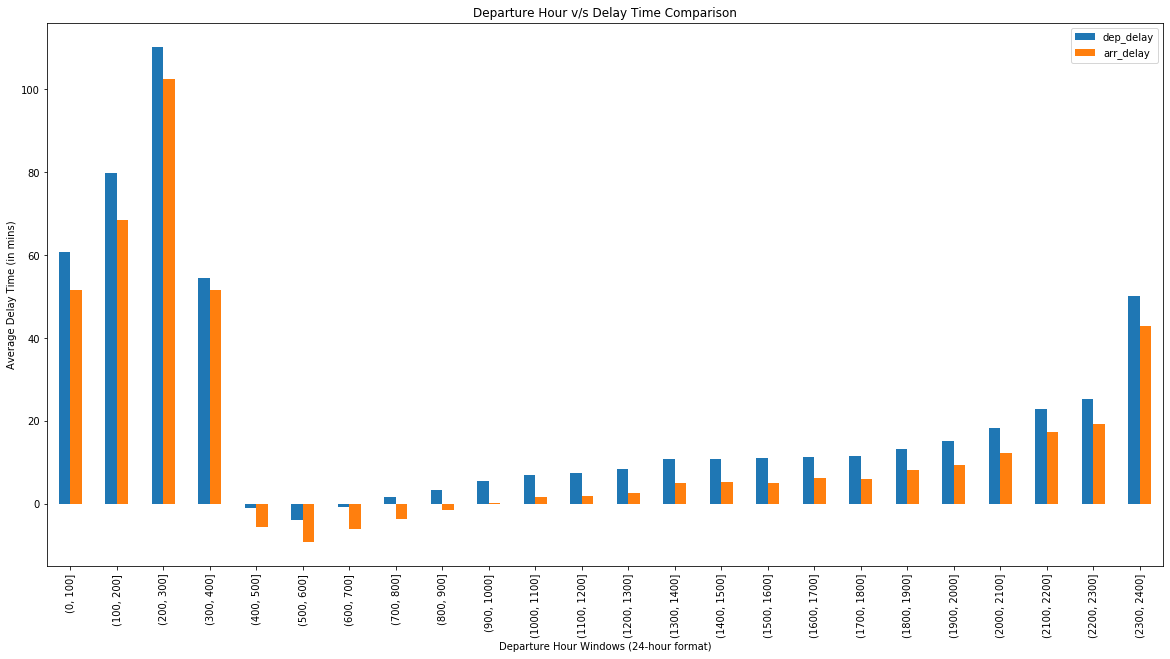

In [3]:
flight_info['dep_hour']=pd.cut(flight_info.dep_time, list(range(0, 2500, 100)))
flight_info.drop(index=flight_info[flight_info.dep_hour.isna()==True].index, inplace=True)
flight_info.groupby('dep_hour').agg({'dep_delay':'mean', 'arr_delay':'mean'}).plot.bar(figsize=(20,10))
plt.xlabel('Departure Hour Windows (24-hour format)')
plt.ylabel('Average Delay Time (in mins)')
plt.title('Departure Hour v/s Delay Time Comparison')
plt.show()

## Best time to travel (without any delays) is between 4AM and 9AM. After that, departure and arrival delays increases as the day passes by.

## 2. Considering that a flight is delayed when the arrival time is greater than the scheduled arrival time, what carrier operators have the maximum flights delayed?

In [4]:
delayed_indicator = []
for index, row in flight_info.iterrows():
    if (row.arr_delay > 0):
        delayed_indicator.append(True)
    else:
        delayed_indicator.append(False)
flight_info['delayed_indicator'] = delayed_indicator

In [5]:
flights_delayed = flight_info[flight_info.delayed_indicator==True]
flights_delayed.dropna(inplace=True, how='any', subset=['carrier_delay', 'security_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay'])
flights_delayed.reset_index(inplace=True)
flights_delayed.drop(columns=['index'], inplace=True)
print(flights_delayed.head())
print(flights_delayed.info())
print(flights_delayed.describe())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


   year  quarter  month  day_of_month  day_of_week op_unique_carrier tail_num  \
0  2019        1      1            13            7                9E   N8688C   
1  2019        1      1            16            3                9E   N981EV   
2  2019        1      1            23            3                9E   N8976E   
3  2019        1      1            13            7                9E   N8688C   
4  2019        1      1            16            3                9E   N981EV   

   op_carrier_fl_num origin origin_city_name  ... air_time flights distance  \
0               3280    ATL      Atlanta, GA  ...     26.0     1.0     83.0   
1               3280    ATL      Atlanta, GA  ...     18.0     1.0     83.0   
2               3280    ATL      Atlanta, GA  ...     25.0     1.0     83.0   
3               3280    CSG     Columbus, GA  ...     31.0     1.0     83.0   
4               3280    CSG     Columbus, GA  ...     31.0     1.0     83.0   

  carrier_delay  weather_delay  nas_de

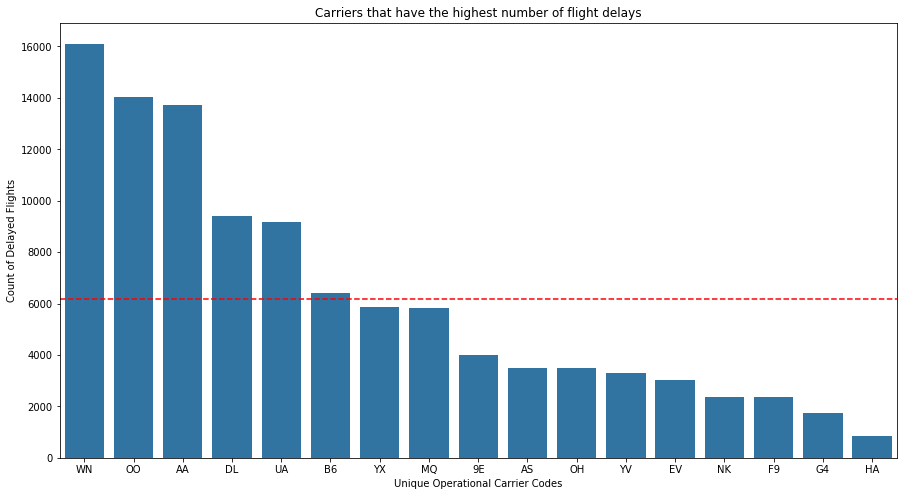

In [6]:
order = flights_delayed.op_unique_carrier.value_counts().index
plt.figure(figsize=(15,8))
sb.countplot(data = flights_delayed, x='op_unique_carrier', order = order, color = sb.color_palette()[0])
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Count of Delayed Flights')
plt.title('Carriers that have the highest number of flight delays')
average_val = round(flights_delayed.count()[0]/flights_delayed.op_unique_carrier.nunique())
plt.axhline(average_val, ls = '--', color="r");

## Flight operators listed below have the maximum flights delayed in January, 2019. 
### WN - Southwest Airlines
### OO - SkyWest Airlines
### AA - American Airlines
### DL - Delta Airlines
### UA - United Airlines

## 3. Of all delayed flights for the above mentioned operators, what is the most reported reason for the delay?

In [7]:
#getting data only for flight carriers that have higher than average delays
carriers_above_average_delay = list(flights_delayed.groupby('op_unique_carrier').op_unique_carrier.count()[flights_delayed.groupby('op_unique_carrier').op_unique_carrier.count() > average_val].index)
flights_delayed_subset = flights_delayed[flights_delayed['op_unique_carrier'].isin(carriers_above_average_delay)]
flights_delayed_subset.reset_index(inplace=True)
flights_delayed_subset.drop(columns=['index'], inplace=True)
print(flights_delayed_subset.head())
print(flights_delayed_subset.info())
print(flights_delayed_subset.describe())

   year  quarter  month  day_of_month  day_of_week op_unique_carrier tail_num  \
0  2019        1      1            13            7                WN   N8557Q   
1  2019        1      1            13            7                WN   N8638A   
2  2019        1      1            13            7                WN   N8731J   
3  2019        1      1            13            7                WN   N231WN   
4  2019        1      1            13            7                WN   N8561Z   

   op_carrier_fl_num origin origin_city_name  ... air_time flights distance  \
0               3075    DEN       Denver, CO  ...    167.0     1.0   1546.0   
1               2410    DEN       Denver, CO  ...    115.0     1.0    895.0   
2               1336    DEN       Denver, CO  ...    109.0     1.0    896.0   
3               4620    DEN       Denver, CO  ...     89.0     1.0    602.0   
4               5294    DEN       Denver, CO  ...    124.0     1.0    948.0   

  carrier_delay  weather_delay  nas_de

Text(0.5, 1.0, 'Departure v/s Arrival Delay Comparison For Operators With Maximum Delays')

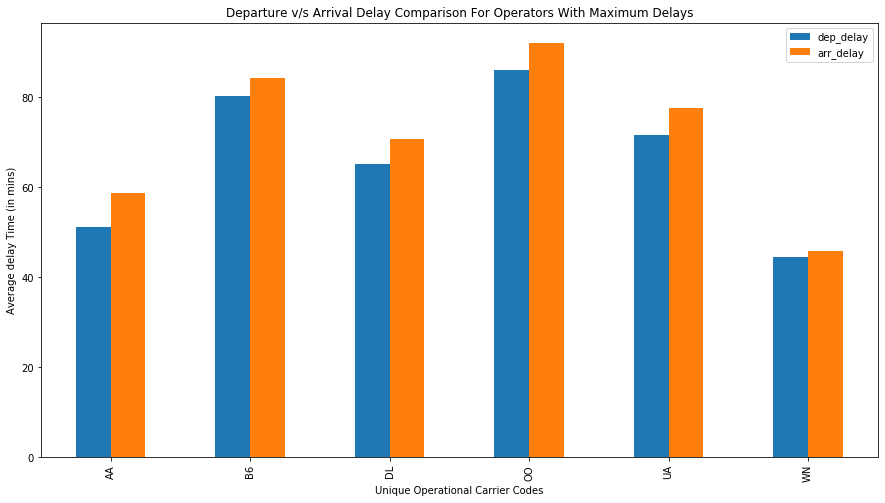

In [9]:
flights_delayed_subset.groupby('op_unique_carrier').agg({'dep_delay':'mean', 'arr_delay':'mean'}).sort_values('op_unique_carrier').plot.bar(figsize=(15,8))
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Average delay Time (in mins)')
plt.title('Departure v/s Arrival Delay Comparison For Operators With Maximum Delays')

Text(0.5, 1.0, 'Delay Reason For Operators With Maximum Delays')

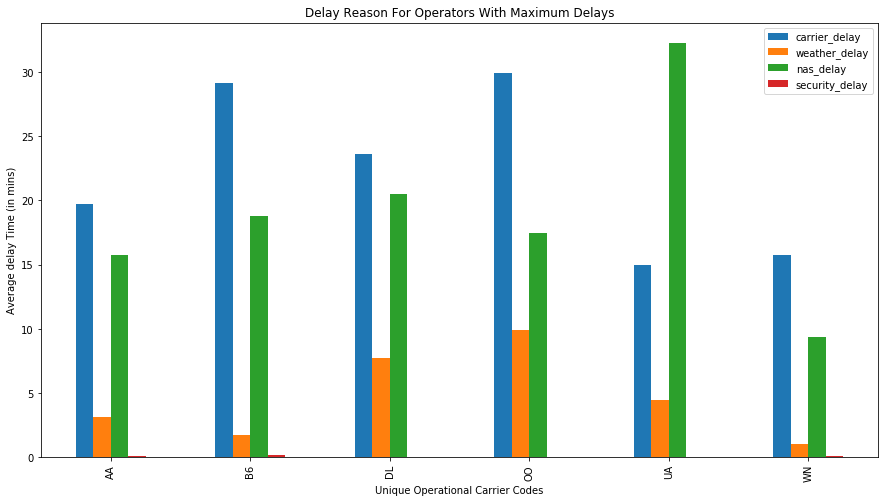

In [10]:
flights_delayed_subset.groupby('op_unique_carrier').agg({'carrier_delay':'mean', 'weather_delay':'mean' , 'nas_delay':'mean', 'security_delay':'mean'}).sort_values('op_unique_carrier').plot.bar(figsize=(15,8))
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Average delay Time (in mins)')
plt.title('Delay Reason For Operators With Maximum Delays')

## For all these operators, OO (or Skywest) has the highest average time of departure and arrival delays, which can be attributed to the carrier operations. 
## However, all the UA (or United Airlines) flights are majorly delayed because of National Air System operations.

## 4. What is the relationship between departure and arrival delays?

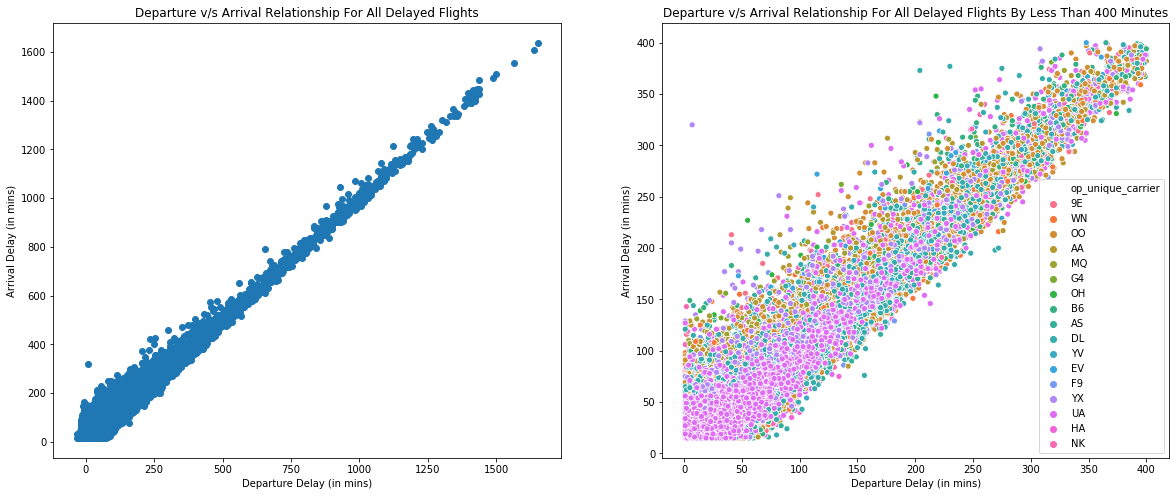

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x=flights_delayed.dep_delay, y=flights_delayed.arr_delay)
plt.xlabel('Departure Delay (in mins)')
plt.ylabel('Arrival Delay (in mins)')
plt.title('Departure v/s Arrival Relationship For All Delayed Flights')
flights_delayed_subset_filtered = flights_delayed.query('dep_delay > 0 and arr_delay > 0 and dep_delay <= 400 and arr_delay <= 400')
plt.subplot(1,2,2)
sb.scatterplot(x=flights_delayed_subset_filtered.dep_delay, y=flights_delayed_subset_filtered.arr_delay, hue=flights_delayed_subset_filtered.op_unique_carrier)
plt.xlabel('Departure Delay (in mins)')
plt.ylabel('Arrival Delay (in mins)')
plt.title('Departure v/s Arrival Relationship For All Delayed Flights By Less Than 400 Minutes')
plt.show()

## There seems to be a linear relationship between departure and arrival delay times (as per the plot on the left). 
## Using color, however, to identify this relationship broken down by each carrier, in plot 2, is not providing much value. 

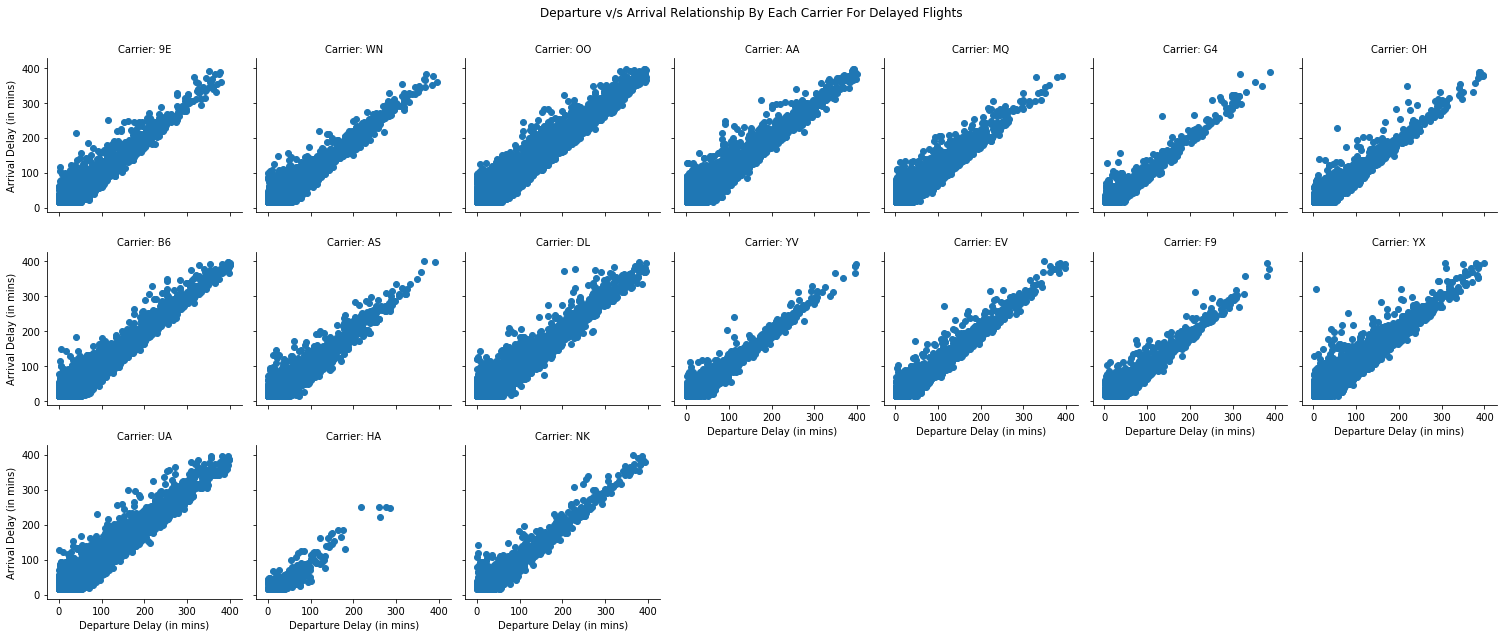

In [19]:
g = sb.FacetGrid(data = flights_delayed_subset_filtered, col = 'op_unique_carrier', col_wrap=7)
g = (g.map(plt.scatter, 'dep_delay', 'arr_delay').set_titles("Carrier: {col_name}"))
g.set_xlabels("Departure Delay (in mins)")
g.set_ylabels("Arrival Delay (in mins)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Departure v/s Arrival Relationship By Each Carrier For Delayed Flights');

## By using grids, it is clear that all the carriers which have delayed flights in January, 2019 follow a linear relationship between departure and arrival delays. In other words, each delayed departed flight will highly likely be delayed on arrival as well. 